In [170]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


In [171]:
train_data = pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Training.csv")  
test_data = pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Testing.csv")  


In [172]:
train_data.shape

(4920, 134)

In [173]:
train_data.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [174]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
yellow_crust_ooze,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [175]:
train_data.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [176]:
train_data=train_data.dropna(axis=1)

In [177]:
disease_counts = train_data["prognosis"].value_counts()
disease_counts

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [178]:
tmp_df= pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})


# cheack classes balance

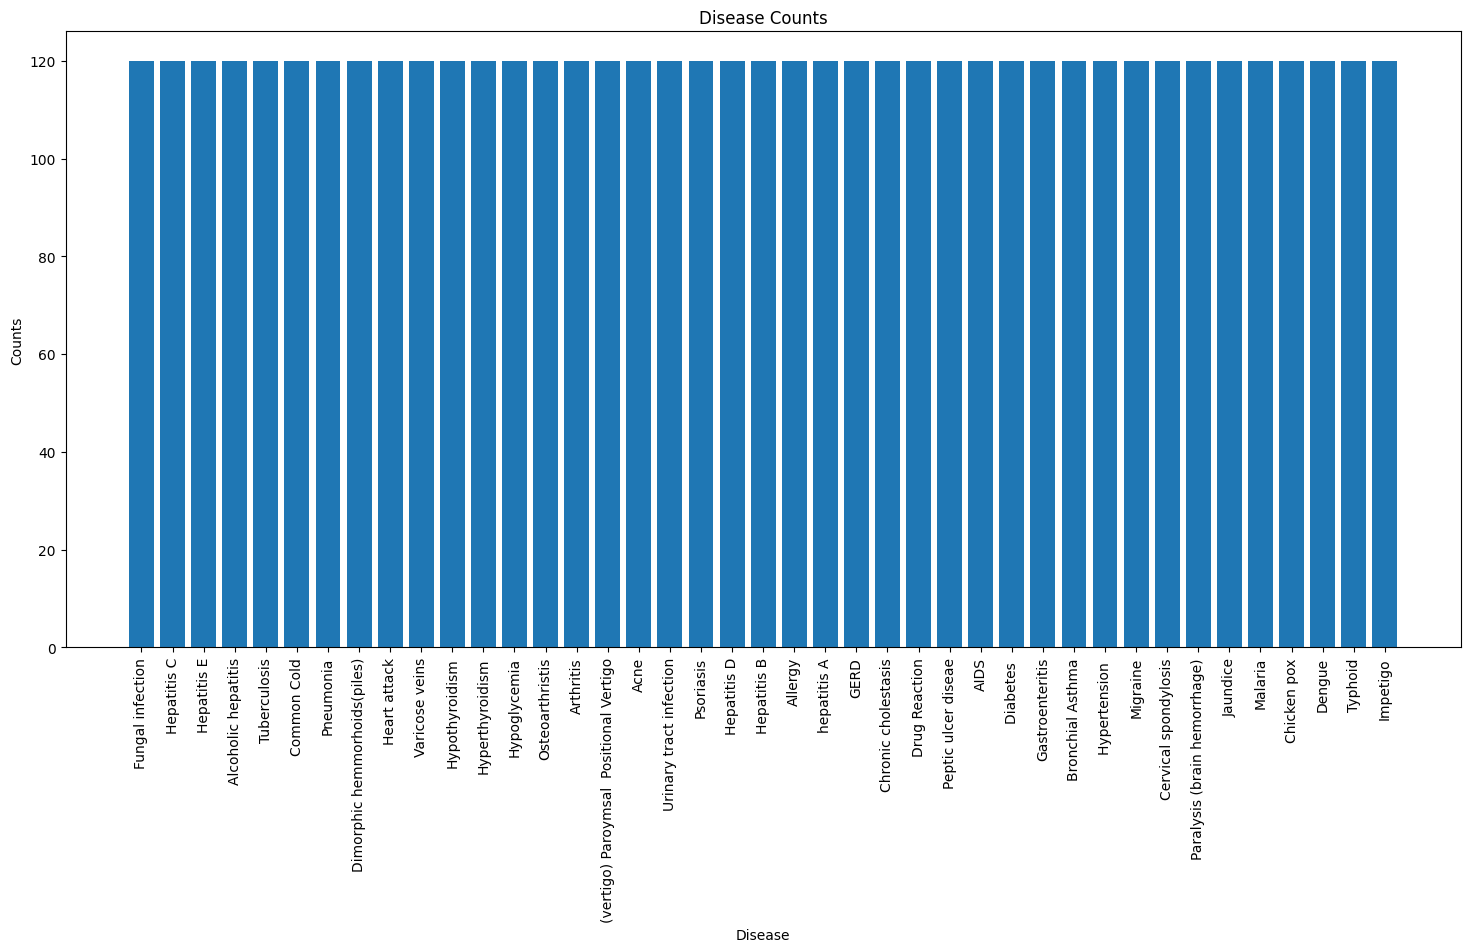

In [179]:
import matplotlib.pyplot as plt

# Assuming tmp_df is a DataFrame with columns 'Disease' and 'Counts'
# Creating the bar plot
plt.figure(figsize= (18,8))
plt.bar(tmp_df["Disease"], tmp_df["Counts"])
# Adding title and labels
plt.title('Disease Counts')
plt.xlabel('Disease')
plt.ylabel('Counts')
plt.xticks(rotation=90)
# Displaying the plot
plt.show()


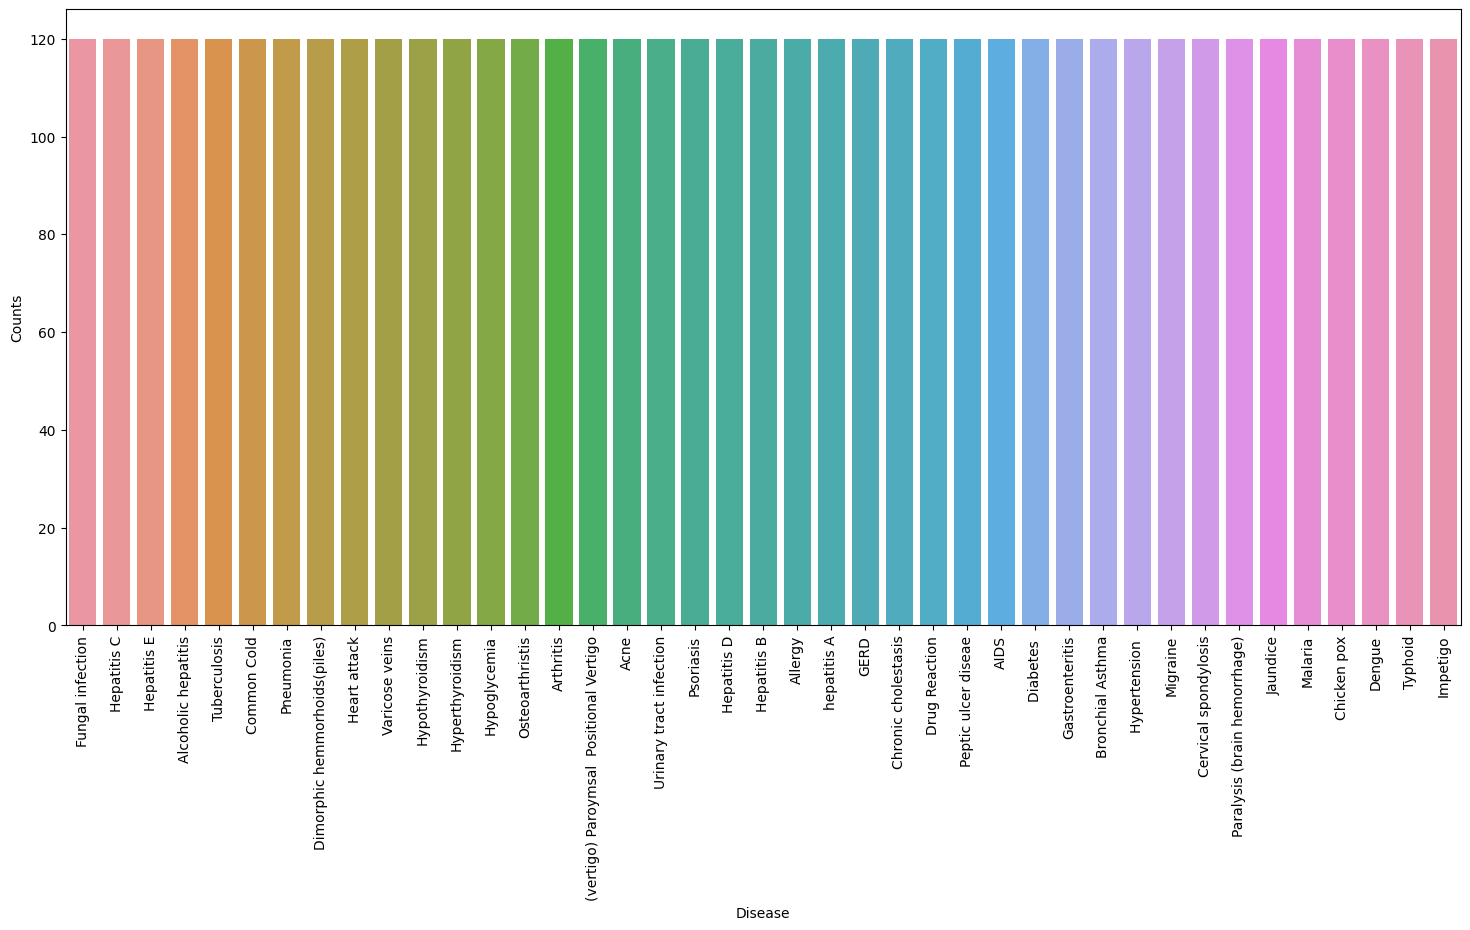

In [180]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y='Counts', data= tmp_df)
plt.xticks(rotation=90)
plt.show()

# Label Encoder

In [181]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
encoder.fit(train_data['prognosis'])
train_data['prognosis']= encoder.transform(train_data['prognosis'])

In [182]:
encoder2= LabelEncoder()
encoder.fit(test_data['prognosis'])
test_data['prognosis']= encoder.transform(test_data['prognosis'])

In [183]:
x_train= train_data.iloc[:, :-1]
y_train= train_data.iloc[:, -1]
x_test= test_data.iloc[:, :-1]
y_test= test_data.iloc[:, -1]

In [184]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from statistics import mode

In [185]:
# Defining scoring metric for k-fold cross validation 
def cv_scoring(estimator, x_train, y_train): 
    return accuracy_score(y_train, estimator.predict(x_train)) 
  
# Initializing Models 
models = { 
    "SVC":SVC(), 
    "Gaussian NB":GaussianNB(), 
    "Random Forest":RandomForestClassifier(random_state=18) 
} 
  
# Producing cross validation score for the models 
for model_name in models: 
    model = models[model_name] 
    scores = cross_val_score(model, x_train, y_train, cv = 10,  
                             n_jobs = -1,  
                             scoring = cv_scoring) 
    print("=="*30) 
    print(model_name) 
    print(f"Scores: {scores}") 
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Accuracy: 1.0


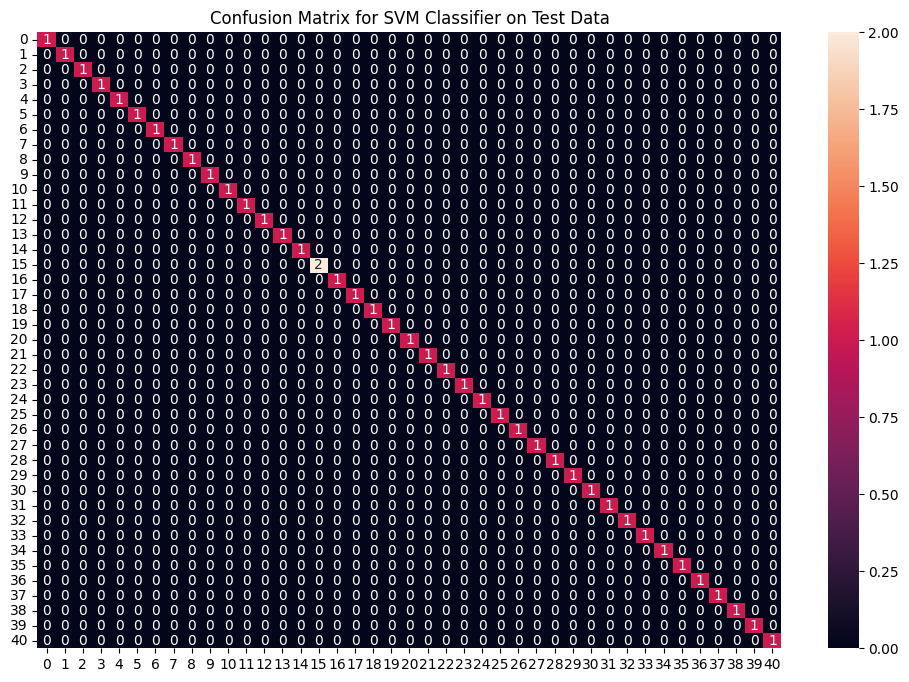

In [187]:
svm_model = SVC()

svm_model.fit(x_train, y_train)

predictions = svm_model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")
#plot confusion
cf_matrix = confusion_matrix(y_test, predictions) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

Accuracy: 1.0


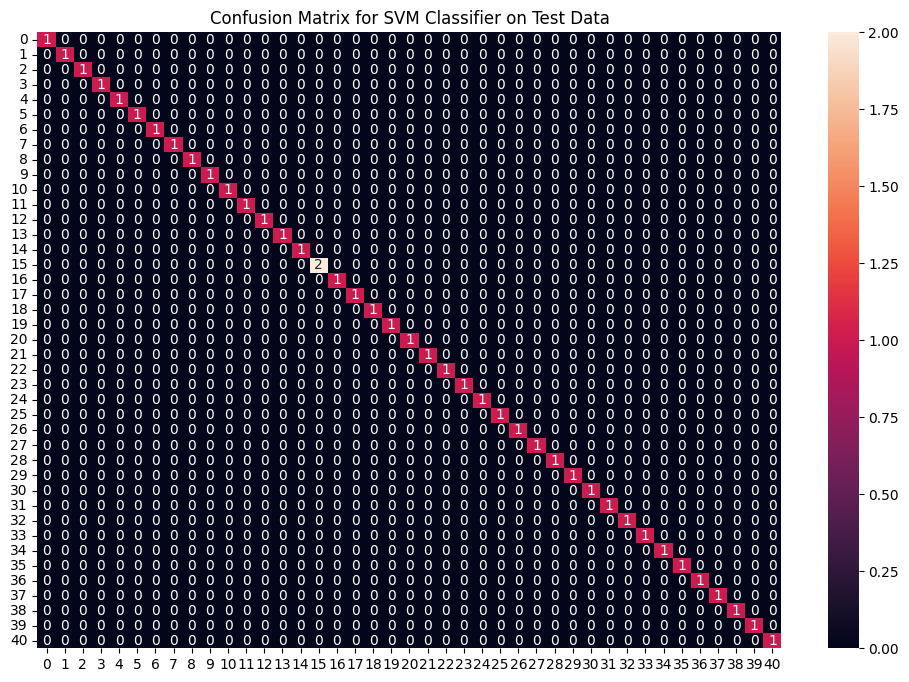

In [188]:
GaussianNB_clf = GaussianNB()

GaussianNB_clf.fit(x_train, y_train)

predictions = GaussianNB_clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")
#plot confusion
cf_matrix = confusion_matrix(y_test, predictions) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

Accuracy: 0.9761904761904762


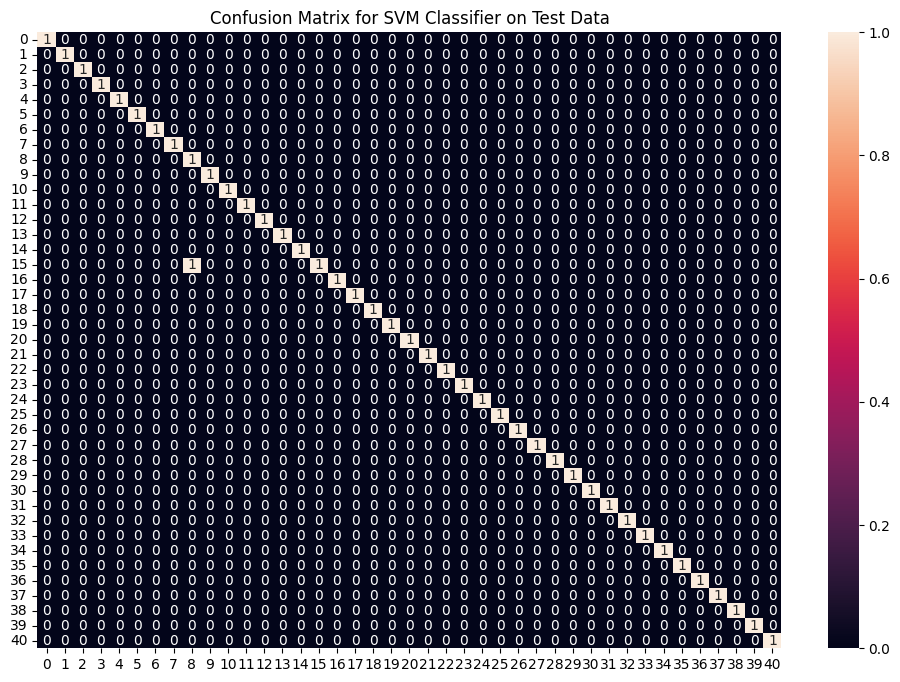

In [189]:
RandomForest_clf = RandomForestClassifier(random_state= 18, n_estimators=200)

RandomForest_clf.fit(x_train, y_train)

predictions = RandomForest_clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")
#plot confusion
cf_matrix = confusion_matrix(y_test, predictions) 
plt.figure(figsize=(12,8)) 
sns.heatmap(cf_matrix, annot=True) 
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
plt.show() 

Accuracy on Test dataset by the combined models: 100.0


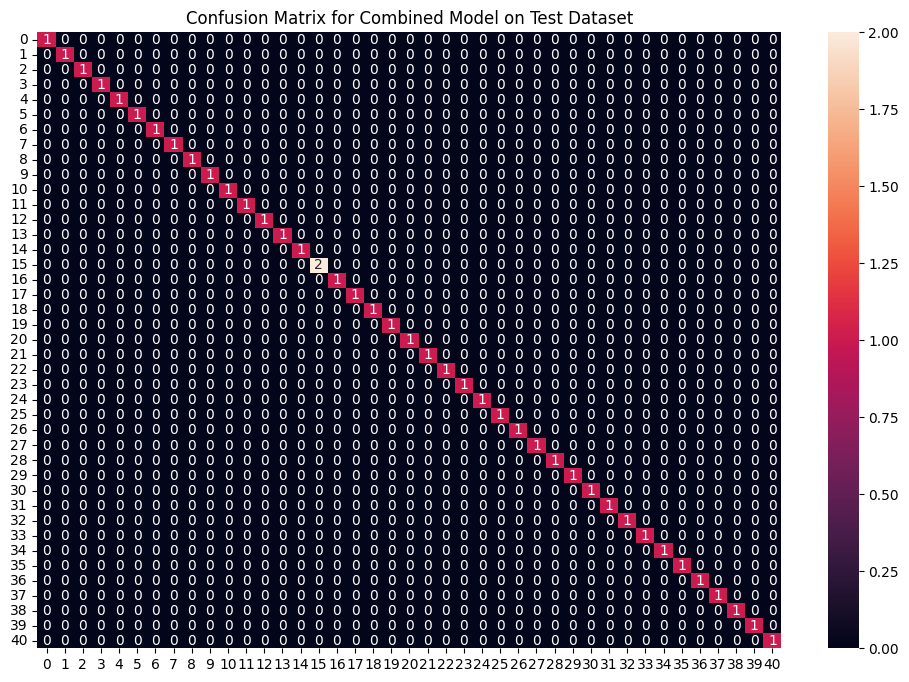

In [190]:
# Training the models on whole data 
final_svm_model = SVC() 
final_nb_model = GaussianNB() 
final_rf_model = RandomForestClassifier(random_state=18) 
final_svm_model.fit(x_train, y_train) 
final_nb_model.fit(x_train, y_train) 
final_rf_model.fit(x_train, y_train) 


# Making prediction by take mode of predictions 
# made by all the classifiers 
svm_preds = final_svm_model.predict(x_test) 
nb_preds = final_nb_model.predict(x_test) 
rf_preds = final_rf_model.predict(x_test) 

final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined models"
      f": {accuracy_score(y_test, final_preds)*100}")


cf_matrix = confusion_matrix(y_test, final_preds) 
plt.figure(figsize=(12,8)) 

sns.heatmap(cf_matrix, annot = True) 
plt.title("Confusion Matrix for Combined Model on Test Dataset") 
plt.show()
